# **Proyecto 1 - Analisis Avanzado de datos**

*Estudiante: Dana Isabella Acosta Castillo*

In [1]:
#Para la visualizion y manipulacion de los datos 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")

#Para el analisis de datos 
import statsmodels.api as sm
from statsmodels.gam.api import GLMGam, BSplines
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#--
from sklearn.preprocessing import scale 
from sklearn.preprocessing import PolynomialFeatures
#--
from sklearn.metrics import mean_squared_error
#--
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
#--
#from islpwf import datasets
from patsy import dmatrix
sns.set()

%matplotlib inline

##Punto 1.

Se cree que variables climáticas podrían ayudar a predecir la generación energética. Busque y agregue al menos 2 variables adicionales relacionadas con el clima (p ej. Precipitaciones, velocidad vientos, temperatura). Se sugiere usar los datos climáticos de la estación del aeropuerto el dorado. Realice una gráfica de dispersión por cada variable agregada vs Kw/h.

In [2]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
import pandas as pd

df=pd.read_csv('/content/gdrive/MyDrive/AAD/P1/datos_final.csv',index_col=0)

In [4]:
df.head()

,kilowatHora,temperatura,precipitacion,humedad
fecha,,,,
1/1/2019,625.839631,13.725,0.0000,77.0
1/2/2019,622.590407,13.900,0.0000,77.0
1/3/2019,626.938902,13.283,0.0000,78.0
1/4/2019,620.755140,13.721,0.0002,78.0
1/5/2019,624.126452,13.546,0.0499,78.0


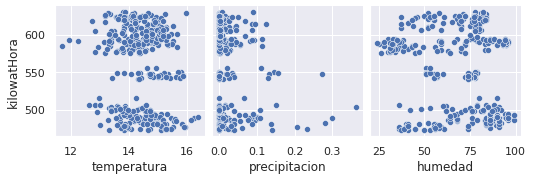

In [5]:
sns.pairplot(df, y_vars = df.columns[0], x_vars = df.columns[1:])

## Punto 2.

Desarrolle un modelo lineal para predecir la generación energética en kw/h según
el clima que se presente en el día y/o la época del año de acuerdo a la siguiente rubrica:

- **Opción 1** - 1 modelo de regresión múltiple OLS mediante statsmodels o sklearn con interpretación de los resultados del modelo y gráficas de resultados - 35 puntos.
- **Opcion 2** - Contraste de modelos OLS, polinomiales y splines junto a interpretación de resultados y gráficas - 60 puntos
- **Adicional** - Incluir la eliminación recursiva de características y/o validación k-fold agrega 10 puntos a cualquiera de los dos anteriores

In [6]:
df = df.dropna()

### Regresion lineal

In [7]:
X = df['kilowatHora']
Y = df['temperatura']

xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=1)
x_train=pd.DataFrame(xtrain)
y_train=pd.DataFrame(ytrain)
x_test=pd.DataFrame(xtest)
y_test=pd.DataFrame(ytest)

El coeficiente es: [[-0.0019377]] el intercepto es: [15.47749614]


Text(0.5, 1.0, 'Linear Regression kw/h-temperatura')

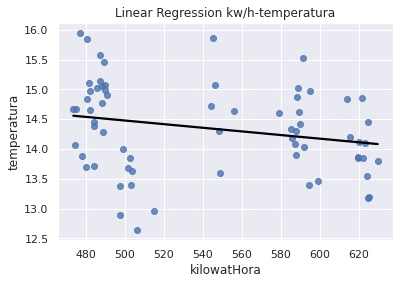

In [8]:
lm=LinearRegression()
lm.fit(x_train,y_train)
print("El coeficiente es:",lm.coef_,"el intercepto es:",lm.intercept_)

lm_pred=lm.predict(x_test)
lm_rmse=mean_squared_error(y_test,lm_pred,squared=False)

plt.figure(figsize=(6,4))
sns.regplot(x=x_test['kilowatHora'],y=y_test['temperatura'],ci=None,line_kws={"color":'black'})
plt.title("Linear Regression kw/h-temperatura")

In [9]:
X = df['kilowatHora']
Y = df['precipitacion']

xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=1)
x_train=pd.DataFrame(xtrain)
y_train=pd.DataFrame(ytrain)
x_test=pd.DataFrame(xtest)
y_test=pd.DataFrame(ytest)

El coeficiente es: [[-0.00016012]] el intercepto es: [0.10966484]


Text(0.5, 1.0, 'Linear Regression kw/h-precipitacion')

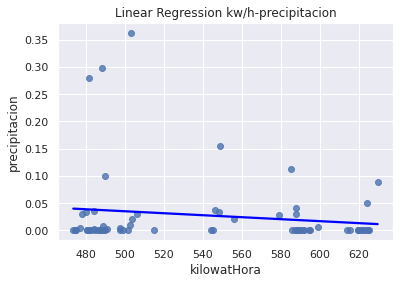

In [10]:
lm=LinearRegression()
lm.fit(x_train,y_train)
print("El coeficiente es:",lm.coef_,"el intercepto es:",lm.intercept_)

lm_pred=lm.predict(x_test)
lm_rmse=mean_squared_error(y_test,lm_pred,squared=False)

plt.figure(figsize=(6,4))
sns.regplot(x=x_test['kilowatHora'],y=y_test['precipitacion'],ci=None,line_kws={"color":'blue'})
plt.title("Linear Regression kw/h-precipitacion")

In [11]:
X = df['kilowatHora']
Y = df['humedad']

xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=1)
x_train=pd.DataFrame(xtrain)
y_train=pd.DataFrame(ytrain)
x_test=pd.DataFrame(xtest)
y_test=pd.DataFrame(ytest)

El coeficiente es: [[-0.02873824]] el intercepto es: [83.87511677]


Text(0.5, 1.0, 'Linear Regression kw/h-humedad')

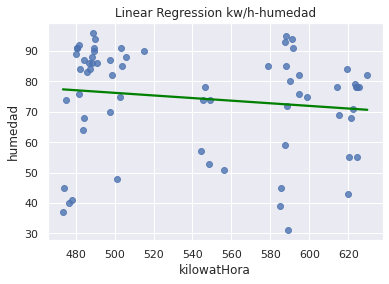

In [12]:
lm=LinearRegression()
lm.fit(x_train,y_train)
print("El coeficiente es:",lm.coef_,"el intercepto es:",lm.intercept_)

lm_pred=lm.predict(x_test)
lm_rmse=mean_squared_error(y_test,lm_pred,squared=False)

plt.figure(figsize=(6,4))
sns.regplot(x=x_test['kilowatHora'],y=y_test['humedad'],ci=None,line_kws={"color":'green'})
plt.title("Linear Regression kw/h-humedad")

In [13]:
df.dtypes

kilowatHora      float64
temperatura      float64
precipitacion    float64
humedad          float64
dtype: object

In [14]:
X = df.iloc[:,1:] # Variables predictoras 
y = df[['kilowatHora']] # Variable la cual queremos predecir

#Separción de datos con 0.2 de test_size
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

df_train = pd.concat([X_train, y_train], axis=1, join="inner")
df_test = pd.concat([X_test, y_test], axis=1, join="inner")

In [15]:
modeloMultiple = smf.ols(formula="kilowatHora~temperatura+precipitacion+humedad", data=df_train).fit()
modeloMultiple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            kilowatHora   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     5.349
Date:                Tue, 13 Sep 2022   Prob (F-statistic):            0.00137
Time:                        03:46:12   Log-Likelihood:                -1452.0
No. Observations:                 268   AIC:                             2912.
Df Residuals:                     264   BIC:                             2926.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       734.1593     65.973     11.128      0.000     604.259     864.060
temperatura     -11.1583      4.610     -2.421      0.016     -20.235      -2.082
precipitacion  -187.5314     69.878     -2.684      0.008    -325.120     -49.943
humedad          -0.1991      0.176     -1.130      0.259      -0.546       0.148
==============================================================================
Omnibus:                    12677.716   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.114
Skew:                          -0.289   Prob(JB):                     1.30e-06
Kurtosis:                       1.553   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
y_pred=modeloMultiple.predict(X_test)
Accuracy=r2_score(y_test,y_pred)
print(Accuracy)

0.10518469228795957


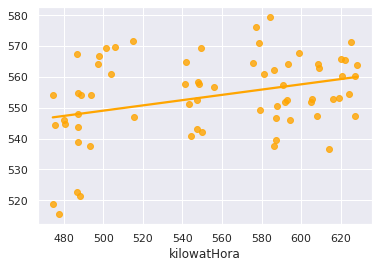

In [17]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='orange');

### Regresion polinomial

In [18]:
# Diccionario vacio para guardar todos los scores generados 
polydic = {}

for d in range(1,5):
  polynom = PolynomialFeatures(degree=d)
  X_train_poly = polynom.fit_transform(X_train)
  poly_model = LinearRegression()
  accuracies = cross_val_score(poly_model, X_train_poly, y_train, cv=4, scoring='r2')
  polydic[d] = np.mean(accuracies)
  print("Para d = "+str(d)+", nuestro modelo tiene un valor de R^2 promedia de: "+str(accuracies.mean()))

Para d = 1, nuestro modelo tiene un valor de R^2 promedia de: 0.03668002709922971
Para d = 2, nuestro modelo tiene un valor de R^2 promedia de: 0.0029552470185802704
Para d = 3, nuestro modelo tiene un valor de R^2 promedia de: -0.013742835628238942
Para d = 4, nuestro modelo tiene un valor de R^2 promedia de: -78.50327140872407


In [19]:
optimal_d = max(polydic, key=polydic.get)
print("Grado óptimo:", optimal_d)

Grado óptimo: 1


El coeficiente polinomial: [[   0.          -11.15831635 -187.5313708    -0.1991259 ]]
El intercepto polinomial: [734.15934455]
El error RMSE polinomial: 49.11595262149078


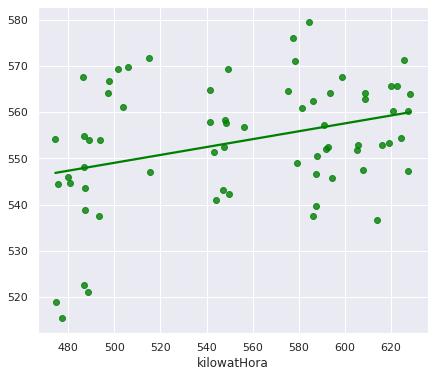

In [20]:
#Regresion polinomial con grado óptimo 
polyReg = PolynomialFeatures(optimal_d)

#Transformamos los datos 
X_train_polyReg = polyReg.fit_transform(X_train)
X_test_polyReg = polyReg.fit_transform(X_test)

#Creamos el modelo 
poly_model = LinearRegression()
poly_model.fit(X_train_polyReg,y_train)
poly_model_pred = poly_model.predict(X_test_polyReg)
poly_model_rmse = mean_squared_error(y_test,poly_model_pred,squared=False)

#Mostramos los resultados
print("El coeficiente polinomial:",poly_model.coef_)
print("El intercepto polinomial:",poly_model.intercept_)
print("El error RMSE polinomial:",poly_model_rmse)

#Grafica
plt.figure(figsize=(7,6))
sns.regplot(x=y_test,y=y_pred,ci=None,color ='green');
plt.show()

### Adicional

**Regresion lineal con eliminacion recursiva**

In [21]:
# Incluir la eliminación recursiva de características y/o validación k-fold agrega 
# 10 puntos a cualquiera de los dos anteriores
model_estimator = SVR(kernel="linear")
selector = RFE(model_estimator,n_features_to_select=2,step=1)
selector = selector.fit(X_train,y_train.values.ravel())

In [22]:
selector.support_

array([ True,  True, False])

In [23]:
modeloMultiple2 = smf.ols(formula="kilowatHora~temperatura+precipitacion", data=df_train).fit()
modeloMultiple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            kilowatHora   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     5.349
Date:                Tue, 13 Sep 2022   Prob (F-statistic):            0.00137
Time:                        03:46:15   Log-Likelihood:                -1452.0
No. Observations:                 268   AIC:                             2912.
Df Residuals:                     264   BIC:                             2926.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       734.1593     65.973     11.128      0.000     604.259     864.060
temperatura     -11.1583      4.610     -2.421      0.016     -20.235      -2.082
precipitacion  -187.5314     69.878     -2.684      0.008    -325.120     -49.943
humedad          -0.1991      0.176     -1.130      0.259      -0.546       0.148
==============================================================================
Omnibus:                    12677.716   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.114
Skew:                          -0.289   Prob(JB):                     1.30e-06
Kurtosis:                       1.553   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

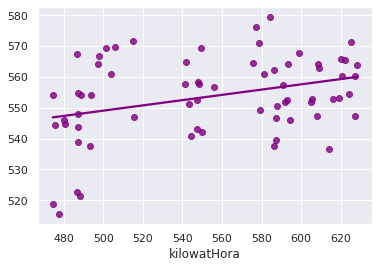

In [24]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='purple');

In [25]:
y_pred=modeloMultiple2.predict(X_test)
Accuracy=r2_score(y_test,y_pred)
print(Accuracy)

0.09176312312288948


## Punto 3.

Se califica orden y presentación del cuaderno jupyter. Se espera contar con una gráfica interactiva que muestre el cambio de las variables predictoras con la generación energética.


In [26]:
!pip install pandas_bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import pandas_bokeh
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

In [41]:
variableso = df['temperatura'],df['humedad'], df['precipitacion']

In [35]:
a =df['kilowatHora']

In [45]:
#df.plot_bokeh(kind='scatter', x=variableso, y=a, alpha=0.7)

Bibliografia:
1. Hastie, T., Tibshirani, R., Friedman, J. The Elements of Statistical Learning. Springer
1. 
1.  